In [9]:
import pandas as pd
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  

observations_df = pd.read_csv('observations.csv')
species_info_df = pd.read_csv('species_info.csv')

# Inspect the structure and summary of the Obeservation Dataset
print("Observations Dataset Info:")
print(observations_df.info())
print("\nObservations Dataset Description:")
print(observations_df.describe())


print("\nObservations Dataset Sample:")
print(observations_df.head())

# Inspect the structure and summary of the Species Dataset
print("\nSpecies Info Dataset Info:")
print(species_info_df.info()) 
print("\nSpecies Info Dataset Description:")
print(species_info_df.describe())


print("\nSpecies Info Dataset Sample:")
print(species_info_df.head())


Observations Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None

Observations Dataset Description:
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000

Observations Dataset Sample:
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theoph


Missing Values in Observations Dataset:
scientific_name    0
park_name          0
observations       0
dtype: int64

Missing Values in Species Info Dataset:
category               0
scientific_name        0
common_names           0
conservation_status    0
dtype: int64


/var/folders/0g/dlg_gczs1m98j36szfrwc_zh0000gn/T/ipykernel_5710/2015269030.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  species_info_df['conservation_status'].fillna('Unknown', inplace=True)
/var/folders/0g/dlg_gczs1m98j36szfrwc_zh0000gn/T/ipykernel_5710/2015269030.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

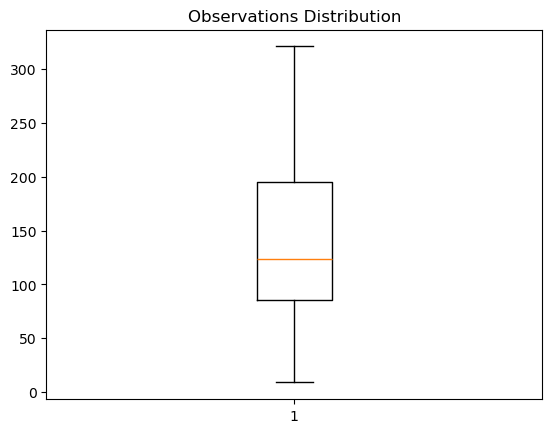

In [13]:
# Cleaning the Data

observations_df = observations_df.drop_duplicates()
species_info_df = species_info_df.drop_duplicates()

# Checking for missing values
print("\nMissing Values in Observations Dataset:")
print(observations_df.isnull().sum())

print("\nMissing Values in Species Info Dataset:")
print(species_info_df.isnull().sum())

# Filling missing values as 'Unknown'
species_info_df['conservation_status'].fillna('Unknown', inplace=True)

# Filling missing values with data median
observations_df['observations'].fillna(observations_df['observations'].median(), inplace=True)

# Ensuring correct data types
observations_df['observations'] = observations_df['observations'].astype(int)

observations_df['park_name'] = observations_df['park_name'].astype(str)
species_info_df['scientific_name'] = species_info_df['scientific_name'].astype(str)


plt.boxplot(observations_df['observations'])
plt.title('Observations Distribution')
plt.show()


In [15]:
# Validating the Data

# Checking for inconsistencies or values that are out of expected ranges

invalid_observations = observations_df[observations_df['observations'] < 0]
print("\nInvalid Observations (negative values):")
print(invalid_observations)


observations_df = observations_df[observations_df['observations'] >= 0]

merged_df = pd.merge(observations_df, species_info_df, on='scientific_name', how='inner')
print("\nMerged Dataset Sample:")
print(merged_df.head())



Invalid Observations (negative values):
Empty DataFrame
Columns: [scientific_name, park_name, observations]
Index: []

Merged Dataset Sample:
            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

  conservation_status

/var/folders/0g/dlg_gczs1m98j36szfrwc_zh0000gn/T/ipykernel_5710/219941030.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=species_info_df, x='conservation_status', palette='Set2')


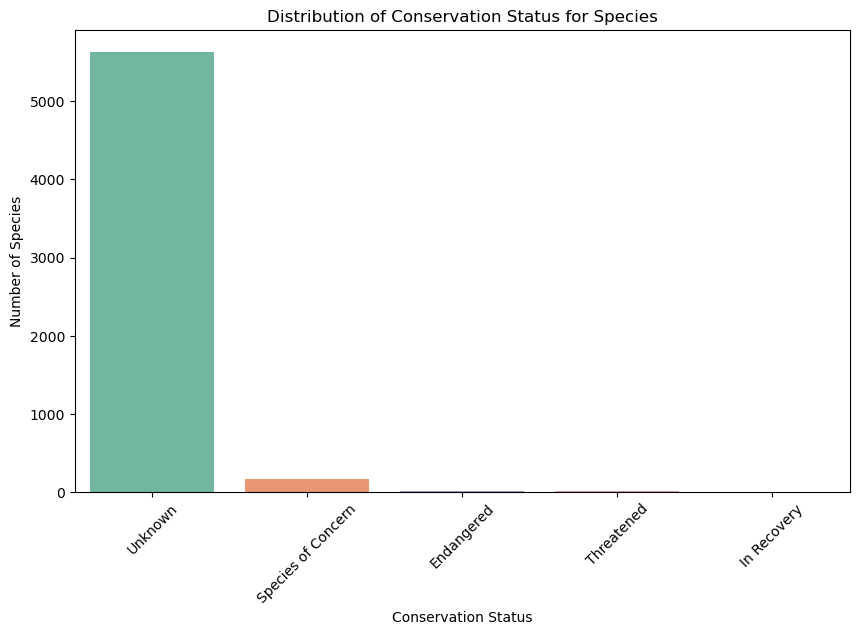

In [29]:
# 1. Distribution of Conservation Status for Animals

plt.figure(figsize=(10, 6))
sns.countplot(data=species_info_df, x='conservation_status', palette='Set2')
plt.title('Distribution of Conservation Status for Species')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.show()


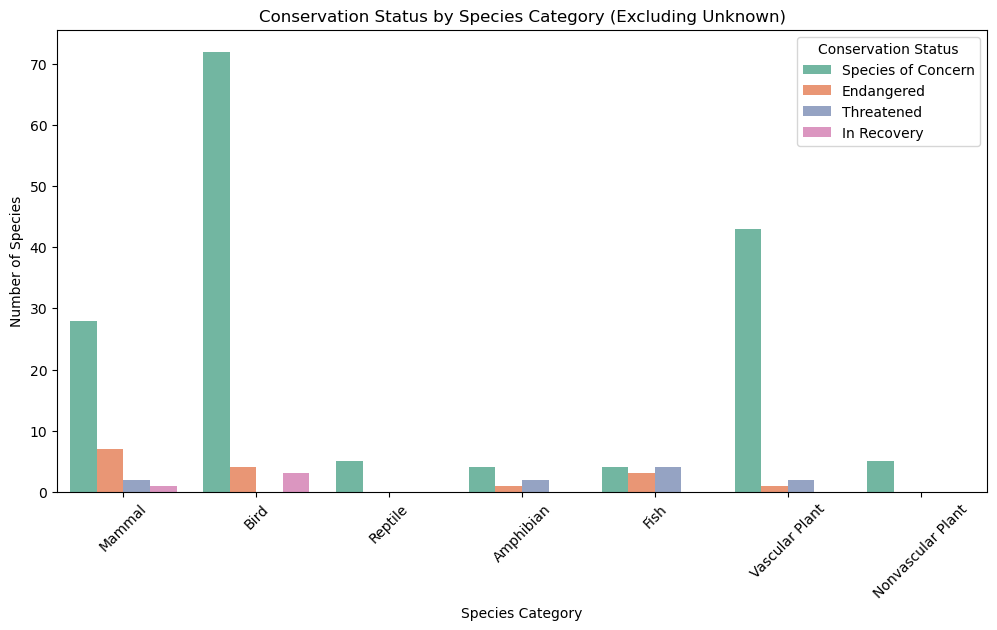

In [25]:
# 2. Are certain types of species more endangedered than others?

# Excluding 'Unknown' status and plot the others
# Filter out rows where conservation status is 'Unknown'
filtered_species_info_df = species_info_df[species_info_df['conservation_status'] != 'Unknown']

# Plotting conservation status by species category, excluding 'Unknown'
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_species_info_df, x='category', hue='conservation_status', palette='Set2')
plt.title('Conservation Status by Species Category (Excluding Unknown)')
plt.xlabel('Species Category')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.legend(title='Conservation Status', loc='upper right')
plt.show()


In [31]:
# The data suggests that Birds are the highest species of concer, followed by Vascular Plants, Then Mammals. However, Mammals have the great number of speices endangered and Fish Species are the highest Threatened


In [33]:

# 3. Are the Differences Between Species and Their Conservation Status Significant?

#Create a contingency table
contingency_table = pd.crosstab(filtered_species_info_df['category'], filtered_species_info_df['conservation_status'])

chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("\nThe differences between species category and conservation status are statistically significant.")
else:
    print("\nThe differences between species category and conservation status are not statistically significant.")


Chi-Square Statistic: 53.91636314015659
P-value: 1.890978834976168e-05

The differences between species category and conservation status are statistically significant.


In [35]:
# There is a significant relationship between species category and conservation status. Certain types of species are more likely to be endangered than others.

/var/folders/0g/dlg_gczs1m98j36szfrwc_zh0000gn/T/ipykernel_5710/544394432.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_n_species_park, x='observations', y='scientific_name', palette='viridis')


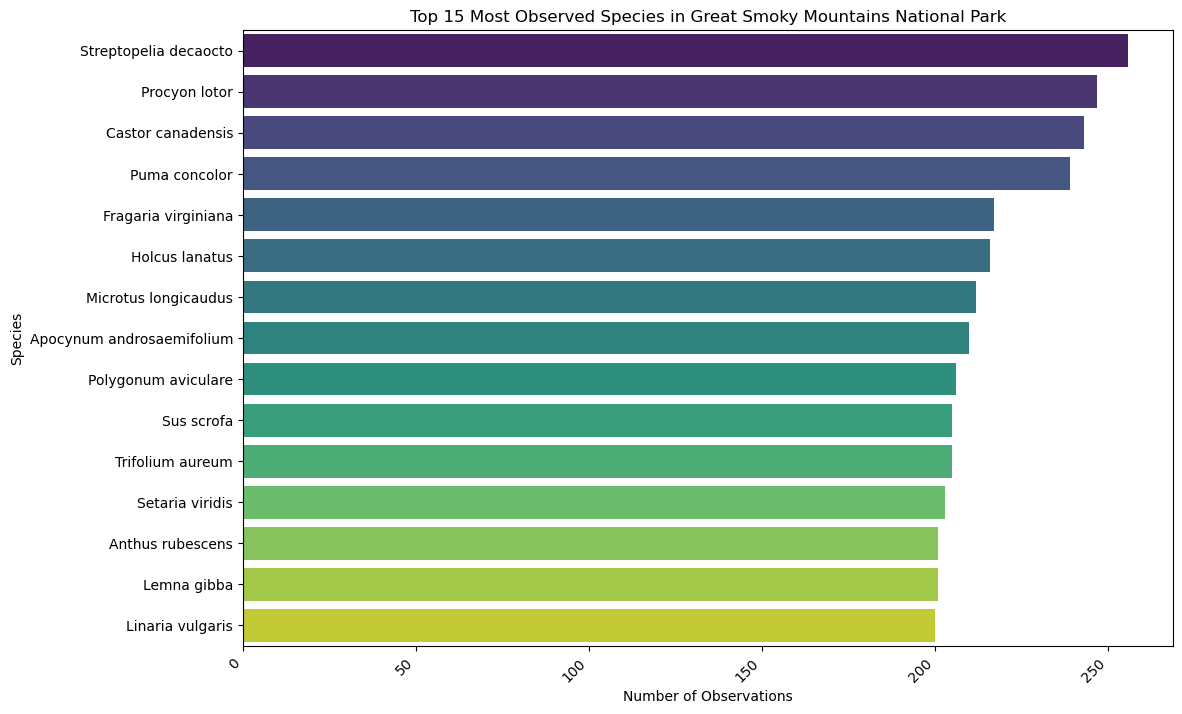

In [41]:
# 4. Which species were spotted the most at each park?

# Selecting the top 15 most observed species in the specified park (e.g., Great Smoky Mountains National Park)
top_n_species_park = top_species_per_park[top_species_per_park['park_name'] == park_to_plot].head(15)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_n_species_park, x='observations', y='scientific_name', palette='viridis')
plt.title(f'Top 15 Most Observed Species in {park_to_plot}')
plt.xlabel('Number of Observations')
plt.ylabel('Species')
plt.xticks(rotation=45, ha='right') 
plt.show()


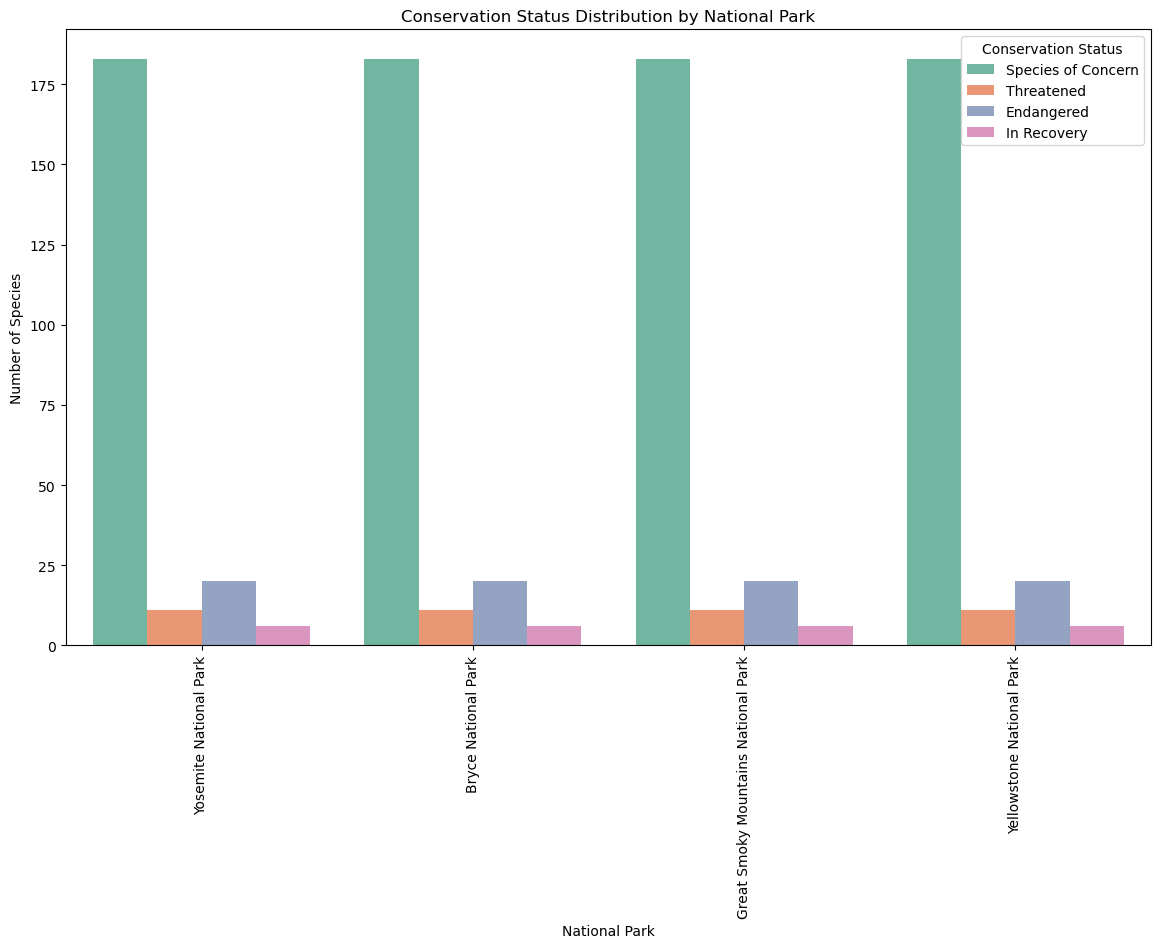

In [47]:
# 5. Visualization of conservation status distribution by national park

filtered_merged_df = merged_df[merged_df['conservation_status'] != 'Unknown']

plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_merged_df, x='park_name', hue='conservation_status', palette='Set2')
plt.title('Conservation Status Distribution by National Park')
plt.xlabel('National Park')
plt.ylabel('Number of Species')
plt.xticks(rotation=90)  # Rotate park names for readability
plt.legend(title='Conservation Status', loc='upper right')
plt.show()


In [49]:
# The above table shows the Relationship between National Parks and Species Conservation Status

/var/folders/0g/dlg_gczs1m98j36szfrwc_zh0000gn/T/ipykernel_5710/3370625761.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_endangered_sorted, x='observations', y='common_names', palette='Set2')


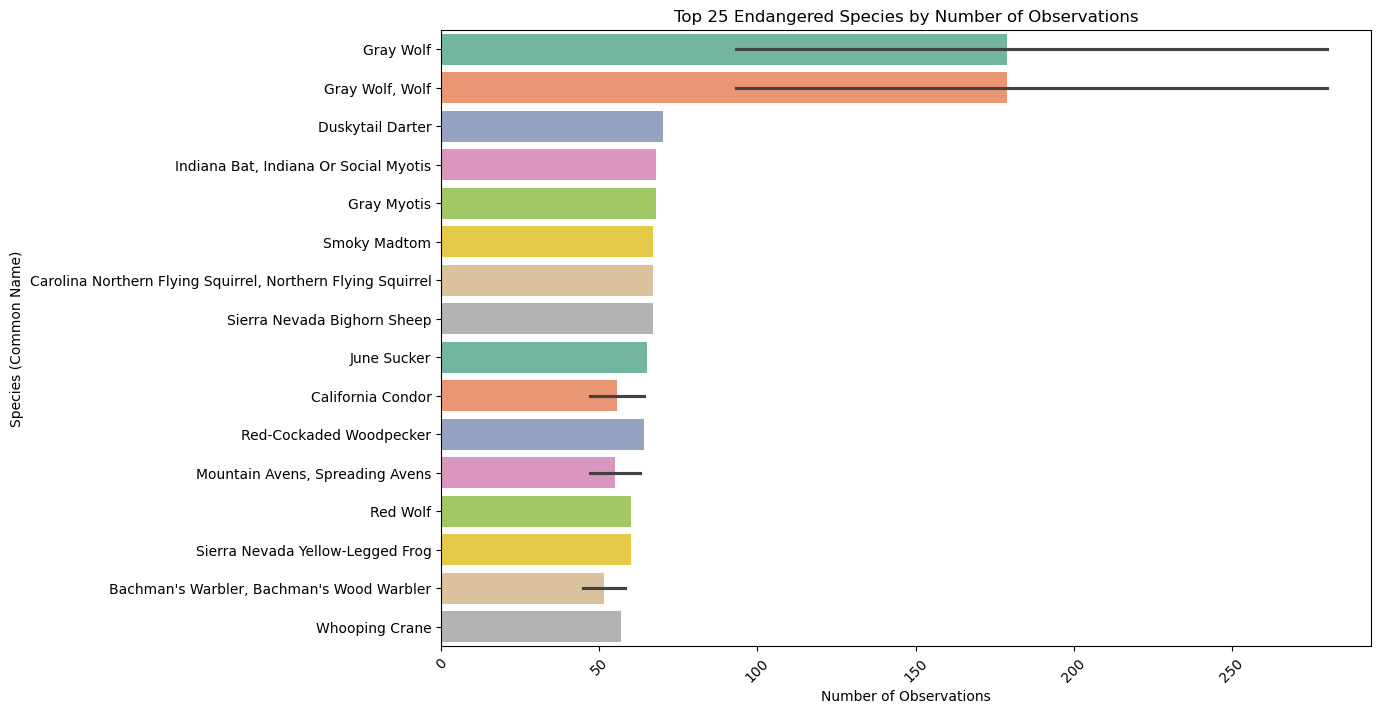

In [53]:
# 5. Finding Top 25 Most Endangered Animasl by common_name
endangered_df = merged_df[merged_df['conservation_status'] == 'Endangered']

top_25_endangered = endangered_df.groupby(['common_names', 'scientific_name', 'park_name'])['observations'].sum().reset_index()
top_25_endangered_sorted = top_25_endangered.sort_values(by='observations', ascending=False).head(25)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_endangered_sorted, x='observations', y='common_names', palette='Set2')
plt.title('Top 25 Endangered Species by Number of Observations')
plt.xlabel('Number of Observations')
plt.ylabel('Species (Common Name)')
plt.xticks(rotation=45)
plt.show()


/var/folders/0g/dlg_gczs1m98j36szfrwc_zh0000gn/T/ipykernel_5710/1673496157.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=park_species_count, x='common_names', y='park_name', palette='Set2')


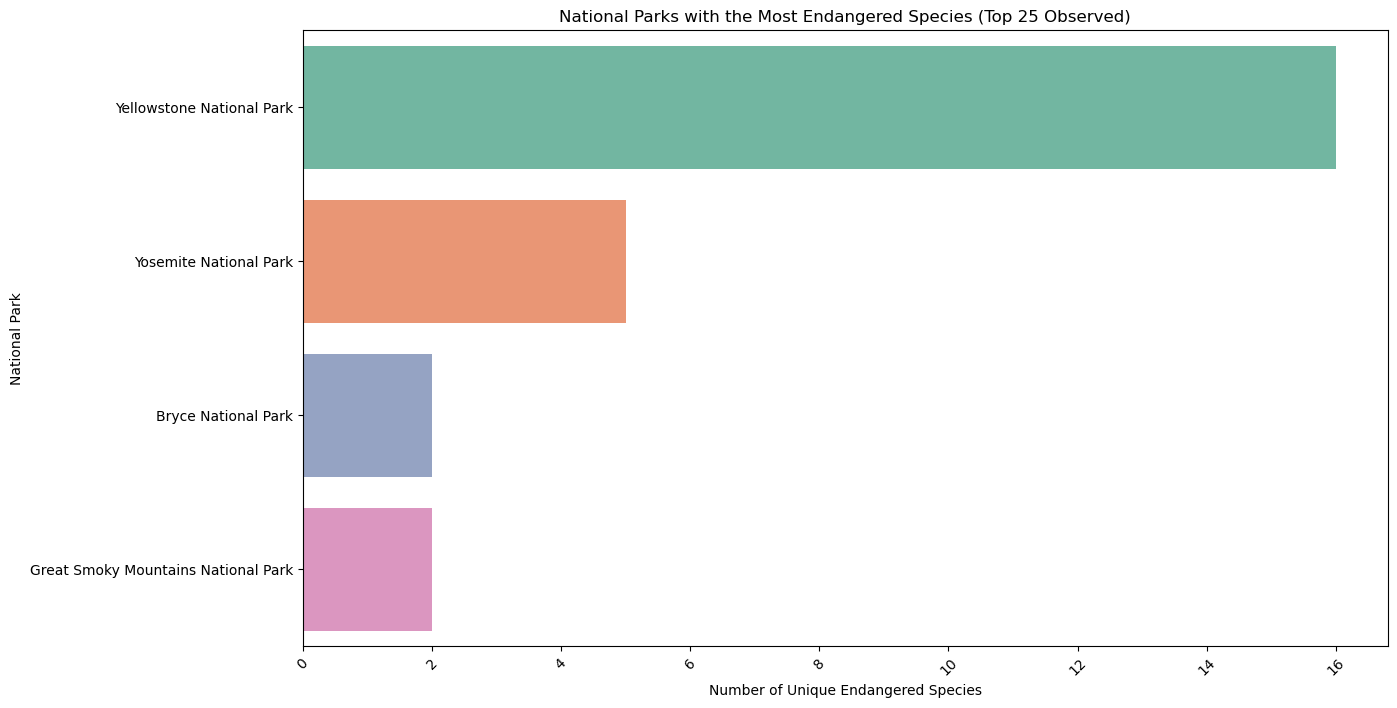

In [55]:
# 6. Finding Where we have the best chances of finding the Endagered Animals
park_species_count = top_25_endangered_sorted.groupby('park_name')['common_names'].nunique().reset_index()
park_species_count = park_species_count.sort_values(by='common_names', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=park_species_count, x='common_names', y='park_name', palette='Set2')
plt.title('National Parks with the Most Endangered Species (Top 25 Observed)')
plt.xlabel('Number of Unique Endangered Species')
plt.ylabel('National Park')
plt.xticks(rotation=45)
plt.show()
